## Order Projection
 Evan Budianto


evanbudianto@gmail.com
08111911805
https://www.linkedin.com/in/evanbudianto/

### Import Libraries

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

### Import Dataset

In [350]:
DATAPATH = r'C:\Users\deniferryanto\OneDrive\Work\Telkomsel-PB93103\DS\recruitment\shopee_dstest.csv'

df = pd.read_csv(DATAPATH, sep=';')
df.head()

,Order Date,Total Order,Delivered D+1,Delivered D+2,Delivered D+3,Delivered D+4,Delivered D+5,Delivered >=D+6
0,01/01/2020,8794,50,2436,1504,510,1776,2518
1,02/01/2020,3496,622,622,210,877,717,448
2,03/01/2020,3384,562,328,1022,589,447,436
3,04/01/2020,3325,53,50,1007,894,888,433
4,05/01/2020,3230,74,543,759,849,601,404


In [351]:
df.tail()

,Order Date,Total Order,Delivered D+1,Delivered D+2,Delivered D+3,Delivered D+4,Delivered D+5,Delivered >=D+6
420,24/02/2021,15590,2822,4428,2947,889,3118,1386
421,25/02/2021,46771,8232,8232,3134,11973,9822,5378
422,26/02/2021,17134,2810,1628,5106,2947,2502,2141
423,27/02/2021,16620,296,133,5086,4305,4537,2263
424,28/02/2021,15789,458,2605,3568,4089,2731,2338


In [352]:
df.shape

(425, 8)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order Date       425 non-null    object
 1   Total Order      425 non-null    int64 
 2   Delivered D+1    425 non-null    int64 
 3   Delivered D+2    425 non-null    int64 
 4   Delivered D+3    425 non-null    int64 
 5   Delivered D+4    425 non-null    int64 
 6   Delivered D+5    425 non-null    int64 
 7   Delivered >=D+6  425 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.7+ KB


In [354]:
# correcting date format
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

In [355]:
# set Order Date as index
df.set_index('Order Date', inplace=True)

In [356]:
df.tail()

,Total Order,Delivered D+1,Delivered D+2,Delivered D+3,Delivered D+4,Delivered D+5,Delivered >=D+6
Order Date,,,,,,,
2021-02-24,15590,2822,4428,2947,889,3118,1386
2021-02-25,46771,8232,8232,3134,11973,9822,5378
2021-02-26,17134,2810,1628,5106,2947,2502,2141
2021-02-27,16620,296,133,5086,4305,4537,2263
2021-02-28,15789,458,2605,3568,4089,2731,2338


In [357]:
df.describe()

,Total Order,Delivered D+1,Delivered D+2,Delivered D+3,Delivered D+4,Delivered D+5,Delivered >=D+6
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,12758.108235,1646.275294,2330.061176,2750.065882,2205.136471,2176.228235,1650.341176
std,11626.547062,1852.515812,2747.987134,2971.261575,2336.868574,2575.777352,2891.854589
min,2024.000000,0.000000,0.000000,0.000000,3.000000,5.000000,267.000000
25%,7000.000000,320.000000,896.000000,1137.000000,905.000000,1023.000000,816.000000
50%,11132.000000,1445.000000,1735.000000,2244.000000,1838.000000,1658.000000,1341.000000
75%,15344.000000,2442.000000,3060.000000,3470.000000,2817.000000,2606.000000,1768.000000
max,119291.000000,21769.000000,32359.000000,37219.000000,32089.000000,32089.000000,52148.000000


<AxesSubplot:xlabel='Order Date'>

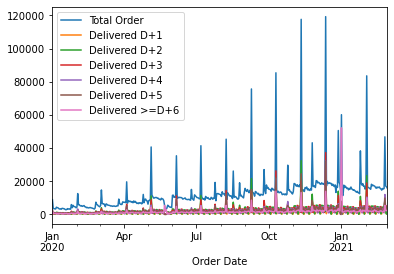

In [358]:
df.plot()

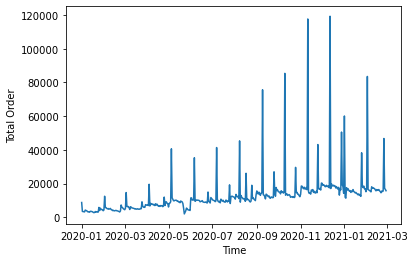

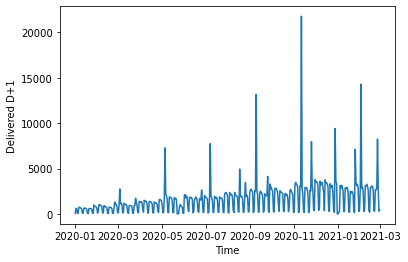

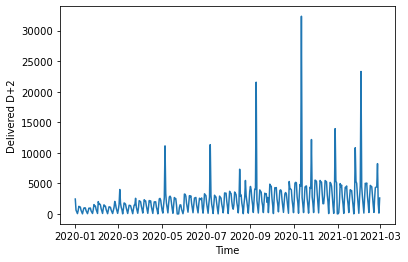

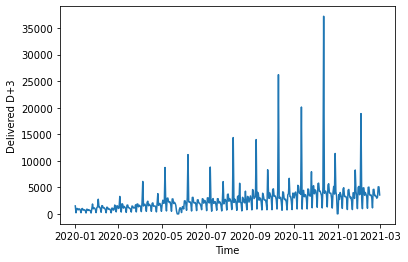

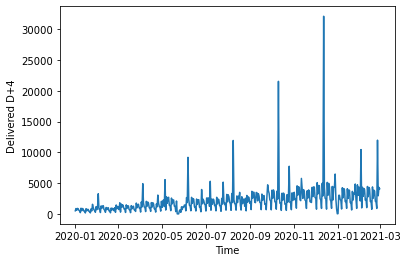

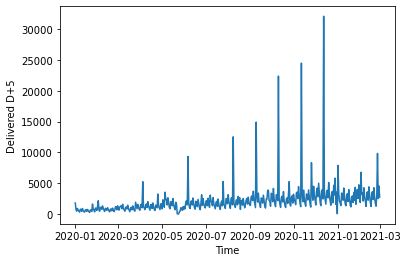

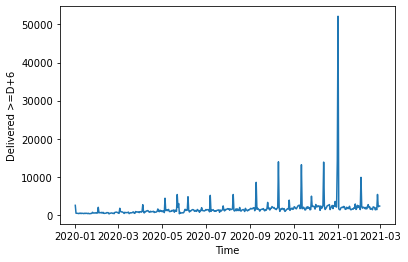

In [89]:
def plot_data(col):
#    plt.figure(figsize=(17, 8))
    plt.plot(df[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df.columns:
    plot_data(col)

### Import Holidays

In [166]:
datapath_holidays = r'C:\Users\deniferryanto\OneDrive\Work\Telkomsel-PB93103\DS\recruitment\shopee_dstest_holidays.csv'

df_holidays = pd.read_csv(datapath_holidays, sep=';')

In [167]:
# correcting date format
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'], format="%d/%m/%Y")

In [168]:
df_holidays.head()

,Campaign Name,Date
0,Double-Double Campaign,2020-01-01
1,Gajian Sale,2020-01-25
2,Double-Double Campaign,2020-02-02
3,Gajian Sale,2020-02-25
4,Double-Double Campaign,2020-03-03


In [170]:
# change columns name to meet prophet requirement
df_holidays.columns = ['holiday', 'ds']
df_holidays.head()

,holiday,ds
0,Double-Double Campaign,2020-01-01
1,Gajian Sale,2020-01-25
2,Double-Double Campaign,2020-02-02
3,Gajian Sale,2020-02-25
4,Double-Double Campaign,2020-03-03


### Modelling

In [64]:
# prophet library hasn't been installed on this computer
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\deniferryanto\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fbprophet-0.7.1            |   py38h7ae7562_0         572 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         572 KB

The following NEW packages will be INSTALLED:

  fbprophet          conda-forge/win-64::fbprophet-0.7.1-py38h7ae7562_0




fbprophet-0.7.1      | 572 KB    |            |   0% 
fbprophet-0.7.1      | 572 KB    | 2          |   3% 
fbprophet-0.7.1      | 572 KB    | #6         |  17% 
fbprophet-0.7.1      | 572 KB    | ###3       |  34% 
fbprophet-0.7.1      | 572 KB    | ####7      |  48% 
fbprophet-0.7.1      | 572 KB    | #######2   |  73% 
fbprophet-0.7.1      | 572 KB    | ###

In [65]:
# update plotly
!pip install --upgrade plotly

In [66]:
# import prophet
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [359]:
# Splitting train and test dataset. Test set is order data from February 2021.
df_train = df.loc[:'2021-01-31']
df_test = df.loc['2021-02-01':]

In [360]:
df_train.tail()

,Total Order,Delivered D+1,Delivered D+2,Delivered D+3,Delivered D+4,Delivered D+5,Delivered >=D+6
Order Date,,,,,,,
2021-01-27,17618,3118,5003,3312,898,3612,1675
2021-01-28,18544,3264,3060,1001,4729,3969,2521
2021-01-29,16921,2843,1574,4975,3012,2487,2030
2021-01-30,17019,269,102,5174,4374,4731,2369
2021-01-31,15195,441,2629,3616,3981,2690,1838


In [361]:
df_test.head()

,Total Order,Delivered D+1,Delivered D+2,Delivered D+3,Delivered D+4,Delivered D+5,Delivered >=D+6
Order Date,,,,,,,
2021-02-01,16715,2908,4630,3811,2106,1855,1405
2021-02-02,83573,14291,23317,18888,10447,6769,9861
2021-02-03,16548,2830,4484,2830,976,3210,2218
2021-02-04,16217,2968,2789,989,4330,3373,1768
2021-02-05,15892,2495,1494,4911,2845,2098,2049


In [363]:
# take first column for modelling
df_train1 = df_train[['Delivered D+1']]

In [364]:
df_train1.head()

,Delivered D+1
Order Date,
2020-01-01,50
2020-01-02,622
2020-01-03,562
2020-01-04,53
2020-01-05,74


In [365]:
# put date index as column and change columns name for prophet
df_train1 = df_train1.reset_index()
df_train1.columns = ['ds', 'y']
df_train1.head()

,ds,y
0,2020-01-01,50
1,2020-01-02,622
2,2020-01-03,562
3,2020-01-04,53
4,2020-01-05,74


In [366]:
# Defining model with yearly seasonality and holidays. Then fitting.
m = Prophet(daily_seasonality=False, yearly_seasonality=True, holidays = df_holidays)
m.fit(df_train1)

In [367]:
# Forecasting February 2021 orders
prediction_size = 28
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)

In [368]:
forecast.tail(28)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Double-Double Campaign,Double-Double Campaign_lower,Double-Double Campaign_upper,Gajian Sale,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
397,2021-02-01,2315.294216,1507.721518,4223.444887,2315.294216,2315.294216,0.000000,0.000000,0.000000,0.000000,...,736.819723,736.819723,736.819723,-170.482238,-170.482238,-170.482238,0.0,0.0,0.0,2881.631701
398,2021-02-02,2319.824278,5444.269340,8141.578807,2319.824278,2319.824278,4110.936521,4110.936521,4110.936521,0.000000,...,539.140175,539.140175,539.140175,-177.980108,-177.980108,-177.980108,0.0,0.0,0.0,6791.920866
399,2021-02-03,2324.354340,1801.303623,4448.779430,2324.354340,2324.354340,0.000000,0.000000,0.000000,0.000000,...,990.036198,990.036198,990.036198,-186.948655,-186.948655,-186.948655,0.0,0.0,0.0,3127.441883
400,2021-02-04,2328.884403,1221.587229,3968.089361,2328.884402,2328.884403,0.000000,0.000000,0.000000,0.000000,...,445.824979,445.824979,445.824979,-197.101440,-197.101440,-197.101440,0.0,0.0,0.0,2577.607942
401,2021-02-05,2333.414465,906.292753,3545.019736,2333.414463,2333.414465,0.000000,0.000000,0.000000,0.000000,...,148.523758,148.523758,148.523758,-208.116741,-208.116741,-208.116741,0.0,0.0,0.0,2273.821482
402,2021-02-06,2337.944527,-709.888289,1970.777802,2337.944523,2337.944529,0.000000,0.000000,0.000000,0.000000,...,-1546.264659,-1546.264659,-1546.264659,-219.649144,-219.649144,-219.649144,0.0,0.0,0.0,572.030724
403,2021-02-07,2342.474589,-493.885507,2099.144110,2342.474583,2342.474592,0.000000,0.000000,0.000000,0.000000,...,-1314.080173,-1314.080173,-1314.080173,-231.341533,-231.341533,-231.341533,0.0,0.0,0.0,797.052883
404,2021-02-08,2347.004651,1520.847803,4220.558943,2347.004643,2347.004656,0.000000,0.000000,0.000000,0.000000,...,736.819723,736.819723,736.819723,-242.837133,-242.837133,-242.837133,0.0,0.0,0.0,2840.987241
405,2021-02-09,2351.534714,1337.899907,4003.693153,2351.534703,2351.534720,0.000000,0.000000,0.000000,0.000000,...,539.140175,539.140175,539.140175,-253.791195,-253.791195,-253.791195,0.0,0.0,0.0,2636.883694
406,2021-02-10,2356.064776,1648.542093,4454.600809,2356.064763,2356.064784,0.000000,0.000000,0.000000,0.000000,...,990.036198,990.036198,990.036198,-263.881995,-263.881995,-263.881995,0.0,0.0,0.0,3082.218978


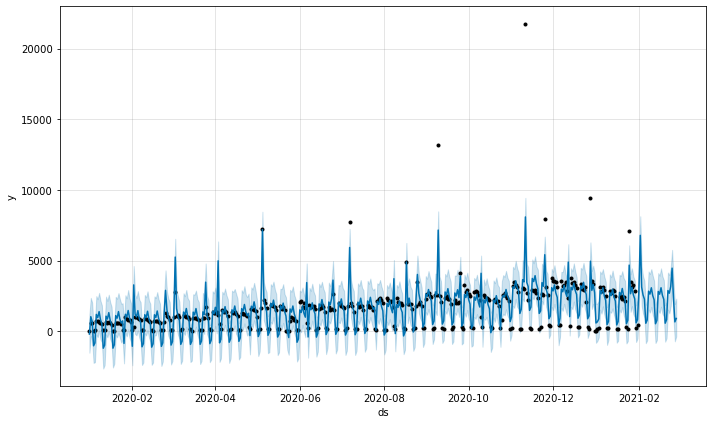

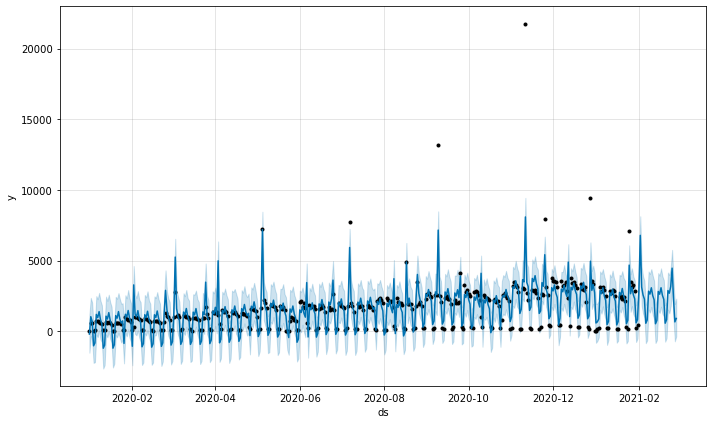

In [331]:
# plot forecast
m.plot(forecast)

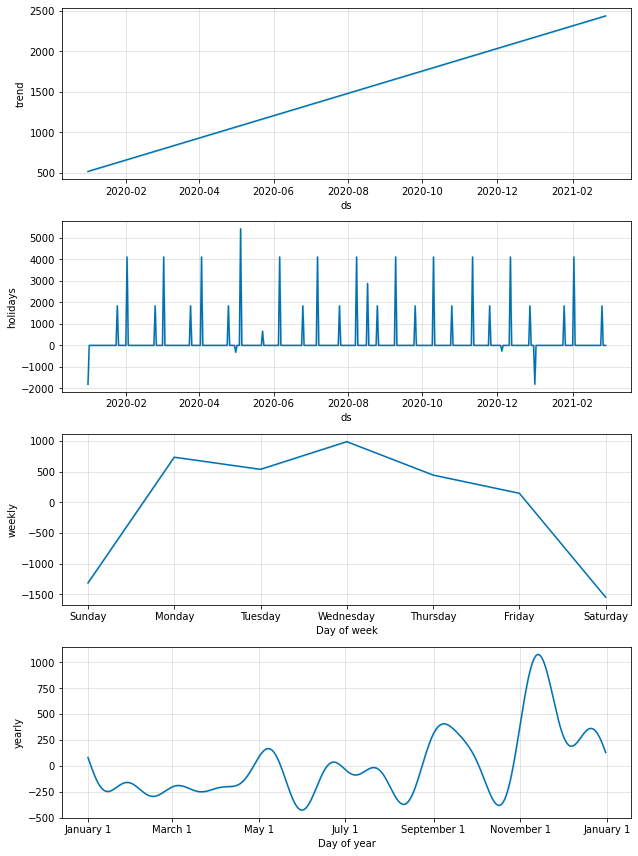

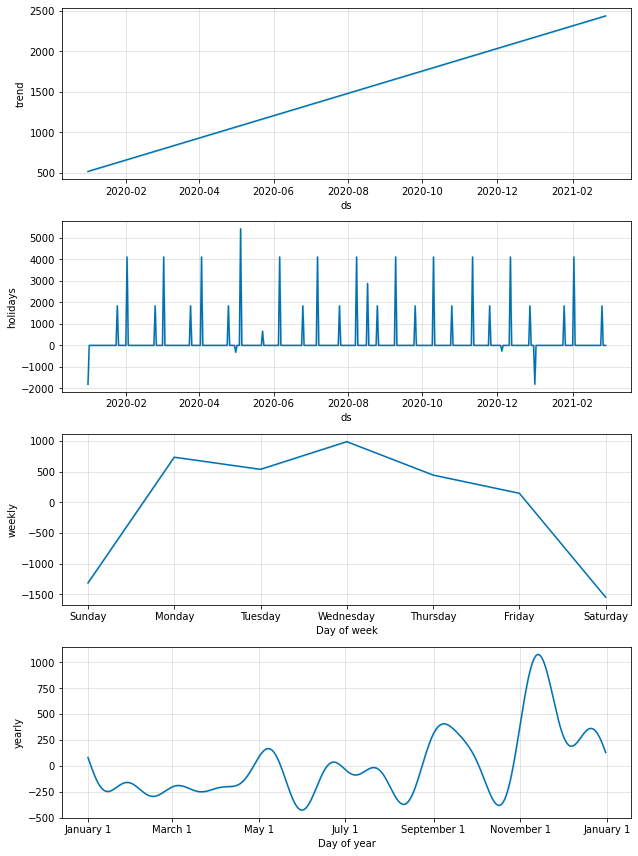

In [175]:
# plot prophet components from model
m.plot_components(forecast)

In [137]:
# function for comparing forecast and real data
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical)

In [370]:
cmp_df = make_comparison_dataframe(df[['Delivered D+1']], forecast)

cmp_df.tail(28)

,yhat,yhat_lower,yhat_upper,Delivered D+1
ds,,,,
2021-02-01,2881.631701,1507.721518,4223.444887,2908
2021-02-02,6791.920866,5444.269340,8141.578807,14291
2021-02-03,3127.441883,1801.303623,4448.779430,2830
2021-02-04,2577.607942,1221.587229,3968.089361,2968
2021-02-05,2273.821482,906.292753,3545.019736,2495
2021-02-06,572.030724,-709.888289,1970.777802,277
2021-02-07,797.052883,-493.885507,2099.144110,438
2021-02-08,2840.987241,1520.847803,4220.558943,3100
2021-02-09,2636.883694,1337.899907,4003.693153,3100


In [189]:
# function for calculation MAPE and MAE
def calculate_forecast_errors(df, prediction_size, col):
    
    df = df.copy()
    
    df['e'] = df[col] - df['yhat']
    df['p'] = 100 * df['e'] / df[col]
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [291]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size, 'Delivered D+1').items():
    print(err_name, err_value)

MAPE 45.475696380837235
MAE 685.7717003504301


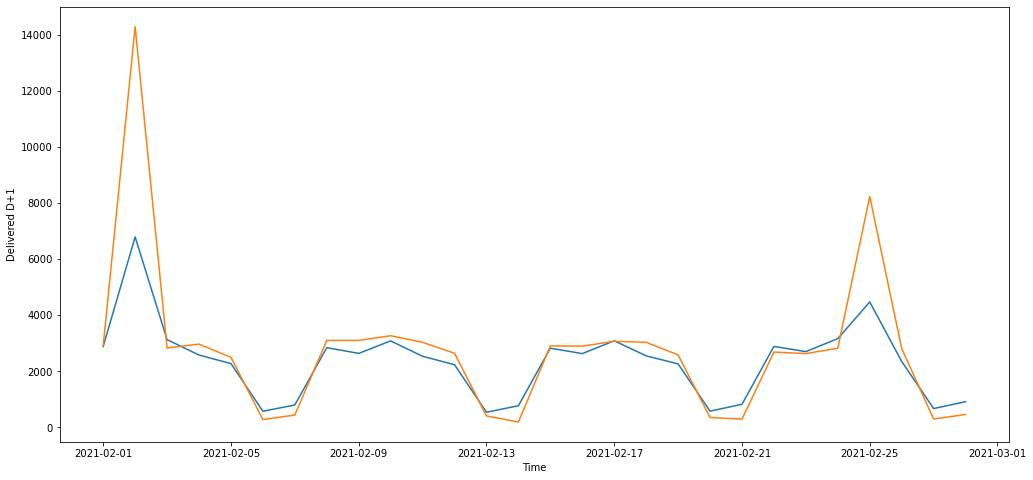

In [292]:
# plotting forecast vs real data
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'].loc['2021-02-01':])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['Delivered D+1'].loc['2021-02-01':])
plt.xlabel('Time')
plt.ylabel('Delivered D+1')
plt.grid(False)
plt.show()

### Modelling on All Columns

In [371]:
def predict_order(col, df_cast):
    # select column to be trained
    train = df_train[[col]]
    test = df_test[[col]]
    
    train = train.reset_index()
    train.columns = ['ds', 'y']
    
    # define model
    m = Prophet(daily_seasonality=False, yearly_seasonality=True, holidays = df_holidays)
    m.fit(train)
    
    # forecasting
    prediction_size = 28
    future = m.make_future_dataframe(periods=prediction_size)
    forecast = m.predict(future)
    
    #comparison
    cmp_df = make_comparison_dataframe(df[[col]], forecast)
    cmp_df.head()
    
    for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size, col).items():
        print(col, err_name, "%.2f" % err_value)
        
    df_x = forecast[['yhat']].tail(28).reset_index(drop=True)
    df_forecast[col] = pd.Series(df_x['yhat'])

In [182]:
df.columns

Index(['Total Order', 'Delivered D+1', 'Delivered D+2', 'Delivered D+3',
       'Delivered D+4', 'Delivered D+5', 'Delivered >=D+6'],
      dtype='object')

In [313]:
# listing all columns to be predicted
column_predict = ['Delivered D+1', 'Delivered D+2', 'Delivered D+3',
       'Delivered D+4', 'Delivered D+5', 'Delivered >=D+6']

In [314]:
# define dataframe for forecast result
df_forecast = df.reset_index()
df_forecast = df_forecast[['Order Date']]
df_forecast.columns = ['ds']
df_forecast = df_forecast[-28:].reset_index(drop=True)
df_forecast.head()

,ds
0,2021-02-01
1,2021-02-02
2,2021-02-03
3,2021-02-04
4,2021-02-05


In [372]:
# running forecasting for all columns
for col in column_predict:
    predict_order(col, df_forecast)

Delivered D+1 MAPE 45.48
Delivered D+1 MAE 685.77
Delivered D+2 MAPE 48.41
Delivered D+2 MAE 844.74
Delivered D+3 MAPE 16.02
Delivered D+3 MAE 655.19
Delivered D+4 MAPE 17.24
Delivered D+4 MAE 667.38
Delivered D+5 MAPE 13.57
Delivered D+5 MAE 592.55
Delivered >=D+6 MAPE 79.91
Delivered >=D+6 MAE 1485.34


In [321]:
df_forecast.head()

,Order Date,Delivered D+1,Delivered D+2,Delivered D+3,Delivered D+4,Delivered D+5,Delivered >=D+6
0,2021-02-01,2881.631701,4426.608149,3564.358116,2378.488465,2203.140410,2627.702623
1,2021-02-02,6791.920866,10236.722149,14241.098787,9548.383495,11578.107683,8495.919025
2,2021-02-03,3127.441883,4853.796740,3069.843111,1192.713077,3282.134884,2717.880903
3,2021-02-04,2577.607942,2843.367602,1513.755989,3470.056748,3021.785288,3335.705634
4,2021-02-05,2273.821482,1988.588029,3754.225506,2324.602518,2151.186930,3642.652851


In [322]:
df_forecast['Total Order'] = df_forecast[column_predict].sum(axis=1)

In [324]:
# rearrange columns
cols = ['Order Date', 'Total Order', 'Delivered D+1', 'Delivered D+2', 'Delivered D+3',
       'Delivered D+4', 'Delivered D+5', 'Delivered >=D+6']
df_forecast = df_forecast[cols]

In [325]:
df_forecast.to_csv(r'C:\Users\deniferryanto\OneDrive\Work\Telkomsel-PB93103\DS\recruitment\shopee_forecast.csv', index=False, sep=',')